## Theoretical Fundations of an Experimental Temporal Weak Measurement Procedure

Sympy, Numpy and Matplotlib is needed to run this notebook, run cell below if not already installed

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import sympy as smp
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

Variable definition

In [5]:
t = smp.symbols('t', real=True)
sigma = smp.symbols(r'\sigma', positive=True, real=True)
a = smp.symbols('a', complex=True)
b = smp.symbols('b', complex=True)
mu = smp.symbols(r'\mu', complex=True)
nu = smp.symbols(r'\nu', complex=True)
tau = smp.symbols(r'\tau', real=True, positive=True)

Preperation of Initial State

In [6]:
H_state = smp.Matrix([[1], [0]])
V_state = smp.Matrix([[0], [1]])
pointer_state = smp.exp(-(t/(2*sigma))**2) / (2*smp.pi * sigma**2)**smp.Rational(1, 4)
display(Math(r'|\zeta\rangle_t = ' + smp.latex(pointer_state)))
polarization_state = a * H_state + b * V_state

initial_state = smp.tensorproduct(polarization_state, pointer_state)
display(Math(r'\left| \Psi_0 \right\rangle = ' + smp.latex(initial_state)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Applying interaction operator $\hat{U} \equiv e^{-\frac{i\mathcal{H}t_{int}}{\hbar}}$ where:

The Hamiltonian of the system is defined as $\mathcal{H} = g(\hat{A} \otimes \hat{E})$. Where $g$ is the coupling strength of the system which is will be assumed as weak for weak measurement regime. With polarization operator $\hat{A} = \ket{H}\bra{H}$, allowing for a weak interaction on $\ket{H}$ of the initial state, and conjugate pointer operator $\hat{E} = i\hbar\frac{\partial}{\partial t}$

We note that the delay introduced experimentally is defined by product of the coupling strength $g$ and interaction time $t_{int}$: $\tau \equiv gt_{int}$

In [7]:
hbar = smp.symbols(r'hbar', real=True, positive=True, constant=True)
g = smp.symbols('g', real=True, positive=True, constant=True)  # coupling strength
A = smp.Matrix([[1, 0], [0, 0]]) # H polarization operator |H><H|
#display(Math(r'\hat{A} = ' + smp.latex(polarization_operator)))

# Define the pointer operator
# The pointer operator is the conjugate energy operator for the pointer state
# It is defined as the product of the imaginary unit, hbar, and the time derivative of the pointer state E = iħ∂/∂t
def pointer_operator(f):
    return smp.I*hbar*smp.diff(f, t)

def polarization_operator(state):
    new_polarization = A*state  # Apply A to polarization state
    
    # Return new tensor product state
    return new_polarization

display(Math(r'\hat{E}|\zeta\rangle = ' + smp.latex(pointer_operator(pointer_state))))
display(Math(r'\hat{A}|\psi\rangle = ' + smp.latex(polarization_operator(polarization_state))))

identity = smp.eye(2)  # Identity operator for the pointer state
display(Math(r'\hat{I} = ' + smp.latex(identity)))

identity_state = smp.tensorproduct(polarization_state, pointer_state)
evolved_pointer_state = smp.I*tau*smp.tensorproduct(polarization_operator(polarization_state), pointer_operator(pointer_state))/hbar

evolved_state =  identity_state - evolved_pointer_state
display(Math(r'|\psi_{evolved}\rangle = ' + smp.latex(evolved_state)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now applying postselection on evolved state, as well to the evolved pointer state, with $\ket{\varsigma} = \mu\ket{H} + \nu\ket{V}$

In [8]:
postselection_state = smp.conjugate(mu)*H_state.T + smp.conjugate(nu)*V_state.T
display(Math(r'\left| \varsigma \right\rangle = ' + smp.latex(postselection_state)))

def apply_postselection(state, postselection):
    state_vector = smp.Matrix(state)
    #display(Math(r'\left| \psi \right\rangle = ' + smp.latex(state_vector)))
    return smp.DotProduct(state_vector, postselection)

postselected_state = apply_postselection(evolved_state, postselection_state).doit().simplify()
display(Math(r'\left| \psi_{post} \right\rangle = ' + smp.latex(postselected_state)))

postselected_pointer_state = apply_postselection(evolved_pointer_state, postselection_state).doit().simplify()
display(Math(r'\left| \zeta_{post} \right\rangle_{t} = ' + smp.latex(postselected_pointer_state)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Real part of Weak Value

In [9]:
exp_t = smp.integrate(smp.conjugate(postselected_state) * t * postselected_state, (t, -smp.oo, smp.oo))
display(Math(r'\langle \hat{t}_{state} \rangle = ' + smp.latex(exp_t.simplify())))

pointer_shift = smp.integrate(smp.conjugate(postselected_pointer_state) * t * postselected_pointer_state, (t, -smp.oo, smp.oo))
display(Math(r'\langle \hat{t}_{pointer} \rangle = ' + smp.latex(pointer_shift.simplify())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Applying initial probability amplitudes of an experimentally prepared state and plot results to see if real part makes sense experimentally

In [10]:
theta = smp.symbols(r'\theta', real=True, positive=True)

exp_t_pol = exp_t.subs(a, smp.cos(theta)).subs(b, smp.sin(theta)).subs(mu, 1/smp.sqrt(2)).subs(nu, 1/smp.sqrt(2)).simplify().rewrite(smp.sin(theta), smp.cos(theta))
display(Math(r'\langle \hat{t}_{state} \rangle = ' + smp.latex(exp_t_pol)))
#postselected_state_pol = (postselected_state.subs(a, smp.cos(theta)).subs(b, smp.sin(theta)).subs(mu, 1/smp.sqrt(2)).subs(nu, 1/smp.sqrt(2))).simplify()
#display(Math(r'\langle \hat{t}_{state} \rangle = ' + smp.latex(postselected_state_pol)))

#pointer_shift_pol = (postselected_state_pol.subs(a, smp.cos(theta)).subs(b, smp.I*smp.sin(theta)).subs(mu, 1/smp.sqrt(2))).simplify()
#display(Math(r'\langle \hat{t}_{pointer} \rangle = ' + smp.latex(pointer_shift_pol)))

#smp.plotting.plot(pointer_shift_pol.subs(tau, 1).subs(sigma,1)*0.00025, (theta, 0, 2*smp.pi), title='Pointer Shift vs Polarization Angle', xlabel='Polarization Angle (rad)', ylabel='Pointer Shift', show=True)


<IPython.core.display.Math object>

## Imaginary part of Weak Value

In [11]:
f = smp.symbols('f', real=True, positive=True)
w = smp.symbols('w', real=True, positive=True)
pointer_state_post_f = smp.fourier_transform(postselected_pointer_state, t, f).doit().simplify()
display(Math(r'| \zeta_{post} \rangle_{\omega} = ' + smp.latex(pointer_state_post_f)))

postselected_state_f = smp.fourier_transform(postselected_state, t, f).doit().simplify()
display(Math(r'| \psi_{post} \rangle_{\omega} = ' + smp.latex(postselected_state_f)))

pointer_shift_w = smp.integrate(smp.conjugate(pointer_state_post_f) * f * pointer_state_post_f, (f, 0, smp.oo))
display(Math(r'\langle \hat{\omega}_{pointer} \rangle_{\omega} = ' + smp.latex(pointer_shift_w.simplify())))

w_exp = smp.integrate(smp.conjugate(postselected_state_f) * f * postselected_state_f, (f, -smp.oo, smp.oo))/smp.integrate(smp.conjugate(postselected_state_f) * postselected_state_f, (f, -smp.oo, smp.oo))
display(Math(r'\langle \hat{\omega}_{state} \rangle_{\omega} = ' + smp.latex(w_exp.simplify())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Experimental verification

Defining experimental variables

In [12]:
phi = smp.symbols(r'\phi', real=True, positive=True)

T_HWP = smp.Matrix([[smp.cos(2*theta), smp.sin(2*theta)], [smp.sin(2*theta), -smp.cos(2*theta)]])
display(Math(r'T_{HWP} = ' + smp.latex(T_HWP)))

T_QWP = smp.exp(-smp.I*smp.pi/4)*smp.Matrix([[smp.cos(phi)**2 + smp.I*smp.sin(phi)**2, (1-smp.I)*smp.sin(phi)*smp.cos(phi)],[(1-smp.I)*smp.cos(phi)*smp.sin(phi), smp.sin(phi)**2 + smp.I*smp.cos(phi)**2]])
display(Math(r'T_{QWP} = ' + smp.latex(T_QWP)))

# Define the initial state of the system to be pulse coming from a polarizing beam splitter
initial_state_exp = smp.tensorproduct(H_state, pointer_state)
display(Math(r'\left| \Psi_0 \right\rangle = ' + smp.latex(initial_state_exp)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Finding real part for $HWP(\theta)$ on initial state $\Psi_0$

<IPython.core.display.Math object>

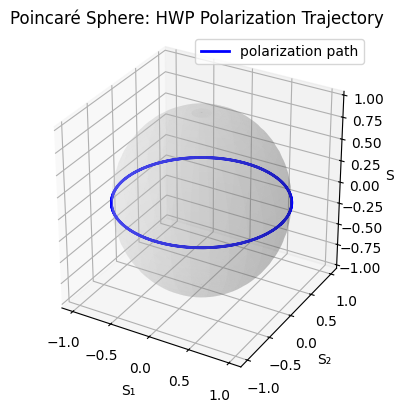

In [13]:
prep_pol_state_HWP = T_HWP * smp.Matrix(H_state)
display(Math(r'\left| \psi_{prep}^{HWP} \right\rangle = ' + smp.latex(prep_pol_state_HWP)))

E_H = prep_pol_state_HWP[0]
E_V = prep_pol_state_HWP[1]

S1 = smp.simplify(abs(E_H)**2 - abs(E_V)**2)
S2 = smp.simplify(2 * (E_H.conjugate() * E_V).as_real_imag()[0])
S3 = smp.simplify(2 * (E_H.conjugate() * E_V).as_real_imag()[1])

f_S1 = smp.lambdify(theta, S1, 'numpy')
f_S2 = smp.lambdify(theta, S2, 'numpy')
f_S3 = smp.lambdify(theta, S3, 'numpy')

theta_vals = np.linspace(0, np.pi, 300)
s1_vals = f_S1(theta_vals)
s2_vals = f_S2(theta_vals)
s3_vals = f_S3(theta_vals)

from mpl_toolkits.mplot3d import Axes3D

# Create unit sphere for reference
u, v = np.mgrid[0:2*np.pi:60j, 0:np.pi:30j]
x_sphere = np.cos(u)*np.sin(v)
y_sphere = np.sin(u)*np.sin(v)
z_sphere = np.cos(v)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot sphere
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightgray', alpha=0.2, linewidth=0)

# Plot polarization trajectory
ax.plot(s1_vals, s2_vals, s3_vals, color='blue', label='polarization path', lw=2)

# Format
ax.set_xlabel('S₁')
ax.set_ylabel('S₂')
ax.set_zlabel('S₃')
ax.set_title('Poincaré Sphere: HWP Polarization Trajectory')
ax.legend()
ax.set_box_aspect([1,1,1])
plt.tight_layout()
plt.show()

In [14]:

identity_state = smp.tensorproduct(prep_pol_state_HWP, pointer_state)
display(Math(r'|I\rangle = ' + smp.latex(identity_state)))

evolved_pointer_state = smp.I*tau*smp.tensorproduct(polarization_operator(prep_pol_state_HWP), pointer_operator(pointer_state))/hbar
display(Math(r'\left| \zeta_{evolved} \right\rangle_{t} = ' + smp.latex(evolved_pointer_state)))

evolved_state = identity_state - evolved_pointer_state
display(Math(r'|\Psi_{evolved}^{HWP}\rangle = ' + smp.latex(evolved_state)))

postselected_state_HWP = apply_postselection(evolved_state, postselection_state).subs(mu, 1/smp.sqrt(2)).subs(nu, 1/smp.sqrt(2)).doit().simplify()
display(Math(r'\left| \Psi_{post}^{HWP} \right\rangle = ' + smp.latex(postselected_state_HWP)))

t_exp_HWP = smp.integrate(smp.conjugate(postselected_state_HWP) * t * postselected_state_HWP, (t, -smp.oo, smp.oo))
display(Math(r'\langle \hat{t}_{state}^{HWP} \rangle = ' + smp.latex(t_exp_HWP.simplify())))

postselected_state_HWP_f = smp.fourier_transform(postselected_state_HWP, t, f).doit().simplify()
display(Math(r'| \Psi_{post}^{HWP} \rangle_{f} = ' + smp.latex(postselected_state_HWP_f)))

w_exp_HWP = smp.integrate(smp.conjugate(postselected_state_HWP_f) * f * postselected_state_HWP_f, (f, -smp.oo, smp.oo))/smp.integrate(smp.conjugate(postselected_state_HWP_f) * postselected_state_HWP_f, (f, -smp.oo, smp.oo))
display(Math(r'\langle \hat{\omega}_{state}^{HWP} \rangle = ' + smp.latex(w_exp_HWP.subs(f*2*smp.pi, w).simplify())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Weak value and probability amplitude calculation for $HWP(\theta)$ on prepared initial state $\Psi_0$

Where the weak value is defined by:

$\langle \hat{\pi} \rangle _W = \frac{\bra{\varsigma}\hat{\pi}\ket{\psi}}{\bra{\varsigma}\ket{\psi}}$

with postselection state $\ket{\varsigma}$ and prepared state $\ket{\psi}$

Weak value components can be written as:

$\langle \hat{\pi} \rangle _W = \frac{1}{\tau}(\braket{\hat{t}} - i4\sigma^2 \braket{\hat{\omega}})$

with real part $\braket{\hat{t}}$ and imaginary part $\braket{\hat{\omega}}$

Finding real part for $QWP(\phi=0)HWP(\theta)$ on initial state $\Psi_0$

<IPython.core.display.Math object>

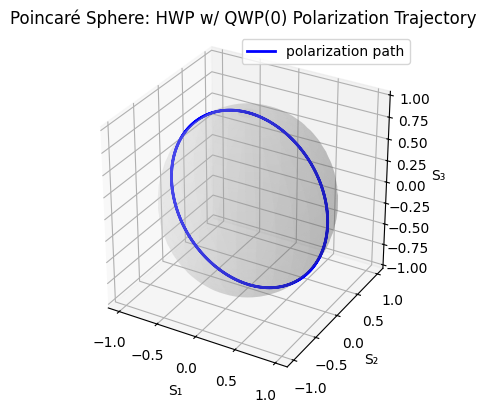

In [15]:
prep_pol_state_QWP_0_HWP = T_QWP.subs(phi, 0)*T_HWP * smp.Matrix(H_state)
display(Math(r'\left| \psi_{prep}^{HWP} \right\rangle = ' + smp.latex(prep_pol_state_QWP_0_HWP)))

E_H = prep_pol_state_QWP_0_HWP[0]
E_V = prep_pol_state_QWP_0_HWP[1]

S1 = smp.simplify(abs(E_H)**2 - abs(E_V)**2)
S2 = smp.simplify(2 * (E_H.conjugate() * E_V).as_real_imag()[0])
S3 = smp.simplify(2 * (E_H.conjugate() * E_V).as_real_imag()[1])

f_S1 = smp.lambdify(theta, S1, 'numpy')
f_S2 = smp.lambdify(theta, S2, 'numpy')
f_S3 = smp.lambdify(theta, S3, 'numpy')

theta_vals = np.linspace(0, np.pi, 300)
s1_vals = f_S1(theta_vals)
s2_vals = f_S2(theta_vals)
s3_vals = f_S3(theta_vals)

from mpl_toolkits.mplot3d import Axes3D

# Create unit sphere for reference
u, v = np.mgrid[0:2*np.pi:60j, 0:np.pi:30j]
x_sphere = np.cos(u)*np.sin(v)
y_sphere = np.sin(u)*np.sin(v)
z_sphere = np.cos(v)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot sphere
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightgray', alpha=0.2, linewidth=0)

# Plot polarization trajectory
ax.plot(s1_vals, s2_vals, s3_vals, color='blue', label='polarization path', lw=2)

# Format
ax.set_xlabel('S₁')
ax.set_ylabel('S₂')
ax.set_zlabel('S₃')
ax.set_title('Poincaré Sphere: HWP w/ QWP(0) Polarization Trajectory')
ax.legend()
ax.set_box_aspect([1,1,1])
plt.tight_layout()
plt.show()

In [16]:
identity_state = smp.tensorproduct(prep_pol_state_QWP_0_HWP, pointer_state)
display(Math(r'|I\rangle = ' + smp.latex(identity_state)))

evolved_pointer_state = smp.I*tau*smp.tensorproduct(polarization_operator(prep_pol_state_QWP_0_HWP), pointer_operator(pointer_state))/hbar
display(Math(r'\left| \zeta_{evolved} \right\rangle_{t} = ' + smp.latex(evolved_pointer_state)))

evolved_state = identity_state - evolved_pointer_state
display(Math(r'|\Psi_{evolved}^{HWP}\rangle = ' + smp.latex(evolved_state)))

postselected_state_QWP_0_HWP = apply_postselection(evolved_state, postselection_state).subs(mu, 1/smp.sqrt(2)).subs(nu, 1/smp.sqrt(2)).doit().simplify()
display(Math(r'\left| \Psi_{post}^{HWP} \right\rangle = ' + smp.latex(postselected_state_QWP_0_HWP)))

t_exp_QWP_0_HWP = smp.integrate(smp.conjugate(postselected_state_QWP_0_HWP) * t * postselected_state_QWP_0_HWP, (t, -smp.oo, smp.oo))
display(Math(r'\langle \hat{t}_{state}^{HWP} \rangle = ' + smp.latex(t_exp_QWP_0_HWP.simplify())))

postselected_state_QWP_0_HWP_f = smp.fourier_transform(postselected_state_QWP_0_HWP, t, f).doit().simplify()
display(Math(r'| \Psi_{post}^{HWP} \rangle_{f} = ' + smp.latex(postselected_state_QWP_0_HWP_f)))

w_exp_QWP_0_HWP = smp.integrate(smp.conjugate(postselected_state_QWP_0_HWP_f) * f * postselected_state_QWP_0_HWP_f, (f, -smp.oo, smp.oo))#/smp.integrate(smp.conjugate(postselected_state_QWP_0_HWP_f) * postselected_state_QWP_0_HWP_f, (f, -smp.oo, smp.oo))
display(Math(r'\langle \hat{\omega}_{state}^{HWP} \rangle = ' + smp.latex(w_exp_QWP_0_HWP.subs(f*2*smp.pi, w).simplify())))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Finding real part for $QWP(\phi=45)HWP(\theta)$ on initial state $\Psi_0$

<IPython.core.display.Math object>

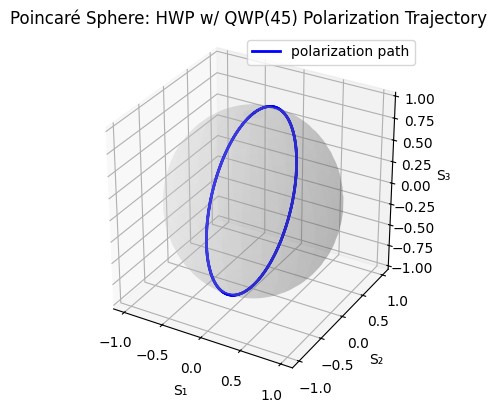

In [24]:
prep_pol_state_QWP_45_HWP = T_QWP.subs(phi, smp.pi/4)*T_HWP.subs(theta, theta-smp.pi/8) * smp.Matrix(H_state)
display(Math(r'\left| \psi_{prep}^{HWP} \right\rangle = ' + smp.latex(prep_pol_state_QWP_45_HWP)))

E_H = prep_pol_state_QWP_45_HWP[0]
E_V = prep_pol_state_QWP_45_HWP[1]

S1 = smp.simplify(abs(E_H)**2 - abs(E_V)**2)
S2 = smp.simplify(2 * (E_H.conjugate() * E_V).as_real_imag()[0])
S3 = smp.simplify(2 * (E_H.conjugate() * E_V).as_real_imag()[1])

f_S1 = smp.lambdify(theta, S1, 'numpy')
f_S2 = smp.lambdify(theta, S2, 'numpy')
f_S3 = smp.lambdify(theta, S3, 'numpy')

theta_vals = np.linspace(0, np.pi, 300)
s1_vals = f_S1(theta_vals)
s2_vals = f_S2(theta_vals)
s3_vals = f_S3(theta_vals)

from mpl_toolkits.mplot3d import Axes3D

# Create unit sphere for reference
u, v = np.mgrid[0:2*np.pi:60j, 0:np.pi:30j]
x_sphere = np.cos(u)*np.sin(v)
y_sphere = np.sin(u)*np.sin(v)
z_sphere = np.cos(v)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot sphere
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightgray', alpha=0.2, linewidth=0)

# Plot polarization trajectory
ax.plot(s1_vals, s2_vals, s3_vals, color='blue', label='polarization path', lw=2)

# Format
ax.set_xlabel('S₁')
ax.set_ylabel('S₂')
ax.set_zlabel('S₃')
ax.set_title('Poincaré Sphere: HWP w/ QWP(45) Polarization Trajectory')
ax.legend()
ax.set_box_aspect([1,1,1])
plt.tight_layout()
plt.show()


In [26]:

identity_state = smp.tensorproduct(prep_pol_state_QWP_45_HWP, pointer_state)
display(Math(r'|I\rangle = ' + smp.latex(identity_state.simplify())))

evolved_pointer_state = smp.I*tau*smp.tensorproduct(polarization_operator(prep_pol_state_QWP_45_HWP), pointer_operator(pointer_state))/hbar
display(Math(r'\left| \zeta_{evolved} \right\rangle_{t} = ' + smp.latex(evolved_pointer_state.simplify())))

evolved_state = identity_state - evolved_pointer_state
display(Math(r'|\Psi_{evolved}^{HWP}\rangle = ' + smp.latex(evolved_state)))

postselected_state_QWP_45_HWP = apply_postselection(evolved_state, postselection_state).subs(mu, 1/smp.sqrt(2)).subs(nu, 1/smp.sqrt(2)).doit().simplify()
display(Math(r'\left| \Psi_{post}^{HWP} \right\rangle = ' + smp.latex(postselected_state_QWP_45_HWP)))

t_exp_HWP = smp.integrate(smp.conjugate(postselected_state_QWP_45_HWP) * t * postselected_state_QWP_45_HWP, (t, -smp.oo, smp.oo))
display(Math(r'\langle \hat{t}_{state}^{HWP} \rangle = ' + smp.latex(t_exp_HWP.simplify())))

postselected_state_QWP_45_HWP_f = smp.fourier_transform(postselected_state_QWP_45_HWP, t, f).doit().simplify()
display(Math(r'| \Psi_{post}^{HWP} \rangle_{f} = ' + smp.latex(postselected_state_QWP_45_HWP_f.simplify())))

w_exp_HWP = smp.integrate(smp.conjugate(postselected_state_QWP_45_HWP_f) * f * postselected_state_QWP_45_HWP_f, (f, -smp.oo, smp.oo))#/smp.integrate(smp.conjugate(postselected_state_QWP_45_HWP_f) * postselected_state_QWP_45_HWP_f, (f, -smp.oo, smp.oo))
display(Math(r'\langle \hat{\omega}_{state}^{HWP} \rangle = ' + smp.latex(w_exp_HWP.subs(f*2*smp.pi, w).simplify())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>